<a href="https://colab.research.google.com/github/vitaoTM/python_projects/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de vendas

#### Importando ferramentas para o projeto

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

## Importando dados

In [2]:
alucar = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/alucar.csv')

In [3]:
alucar.head(3)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33


In [4]:
alucel = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/alucel.csv')
alucel.head(3)

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36


In [5]:
print(f'Quantidade de linhas e colunas {alucar.shape}')

Quantidade de linhas e colunas (24, 2)


In [6]:
print(f'Quntidade de dados nulos = {alucar.isna().sum().sum()}')

Quntidade de dados nulos = 0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

### Plotando e estilizando graficos 

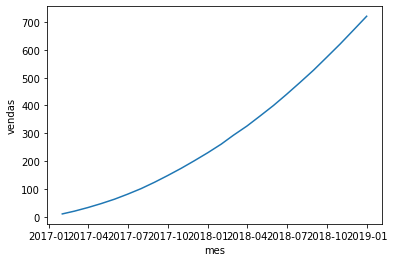

In [9]:
sns.lineplot(x='mes', y='vendas', data=alucar)

Text(0, 0.5, 'Numero de vendas')

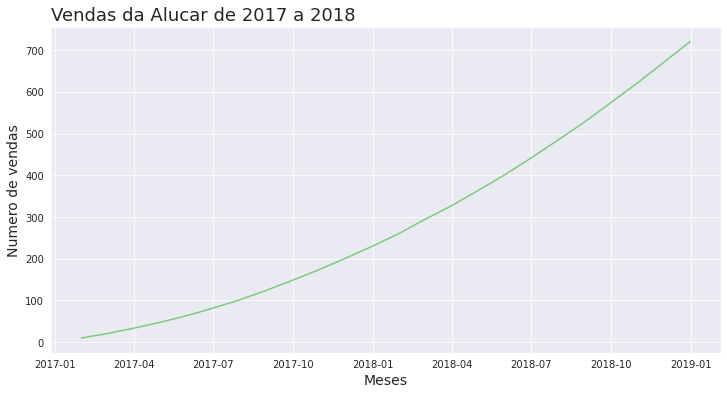

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar de 2017 a 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Numero de vendas', fontsize=14)

In [11]:
print('AHHHH')

AHHHH


In [12]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head(5)

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


Text(0, 0.5, 'Aumento de vendas')

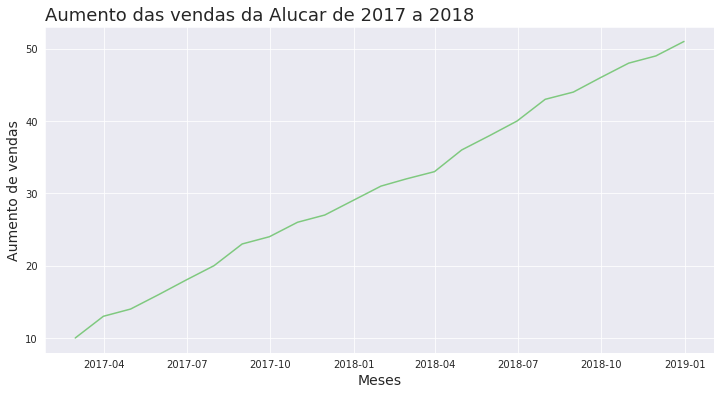

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax2 = sns.lineplot(x='mes', y='aumento', data=alucar)
ax2.figure.set_size_inches(12,6)
ax2.set_title('Aumento das vendas da Alucar de 2017 a 2018', loc='left', fontsize=18)
ax2.set_xlabel('Meses', fontsize=14)
ax2.set_ylabel('Aumento de vendas', fontsize=14)

### Automatizando criando uma função

In [14]:
def plotar(titulo, label_x, label_y, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(label_x,  fontsize=14)
    ax.set_ylabel(label_y, fontsize=14)
    ax=ax

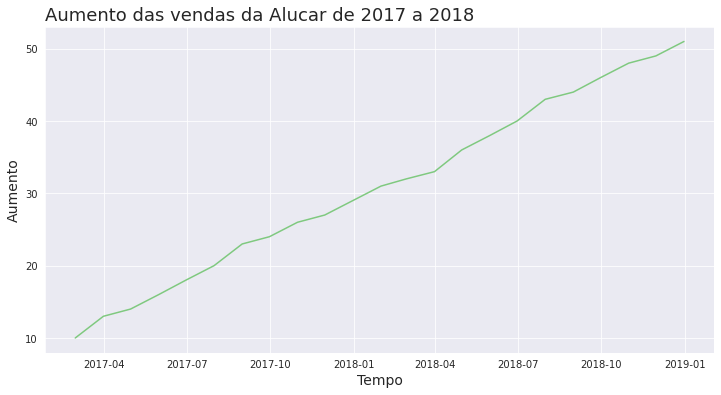

In [15]:
plotar('Aumento das vendas da Alucar de 2017 a 2018', 'Tempo',
       'Aumento', 'mes', 'aumento', alucar)

In [16]:
alucar['aceleracao'] = alucar['aumento'].diff()

In [17]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


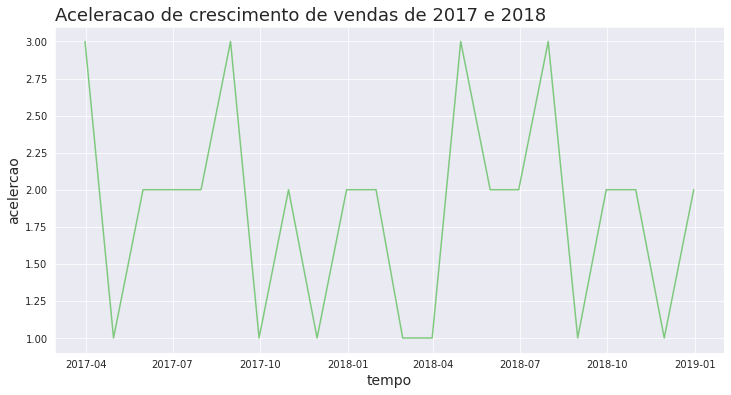

In [18]:
plotar('Aceleracao de crescimento de vendas de 2017 e 2018', 'tempo', 
       'acelercao', 'mes', 'aceleracao', alucar)

Decomposição dos dados

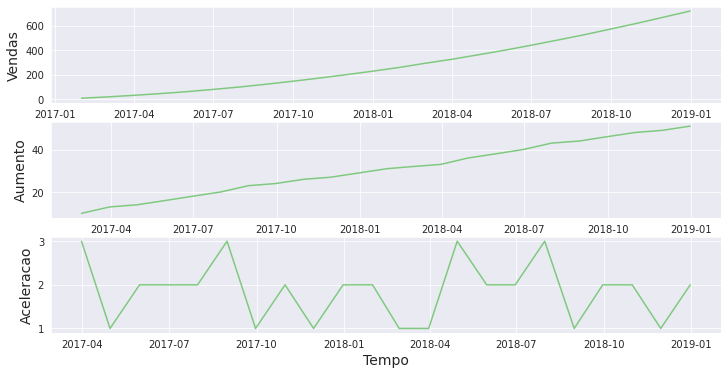

In [19]:

plt.figure(figsize=(18,16))
ax.set_title('Analise de vendas da alucar de 2017 e 2018', fontsize =(18), loc='left')
ax = plt.subplot(3, 1, 1)
plotar('', 'Tempo',
       'Vendas', 'mes', 'vendas', alucar)
plt.subplot(3,1,2)
plotar('', 'Tempo',
       'Aumento', 'mes', 'aumento', alucar)
plt.subplot(3,1,3)
plotar('', 'Tempo',
       'Aceleracao', 'mes', 'aceleracao', alucar)


## **Autocorrelação** 


Correlação de valores de uma mesma variável ordenados no tempo.

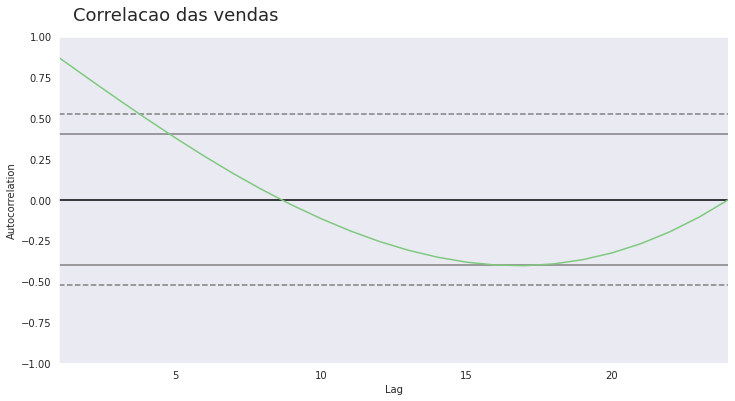

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize =18, x=0.26, y=.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

In [21]:
def auto_correlacao(titulo, dataset, indice):
    ax = plt.figure(figsize=(12,6))
    ax.suptitle(titulo, fontsize =18, x=0.26, y=.95)
    autocorrelation_plot(alucar[dataset][indice:])
    ax= ax

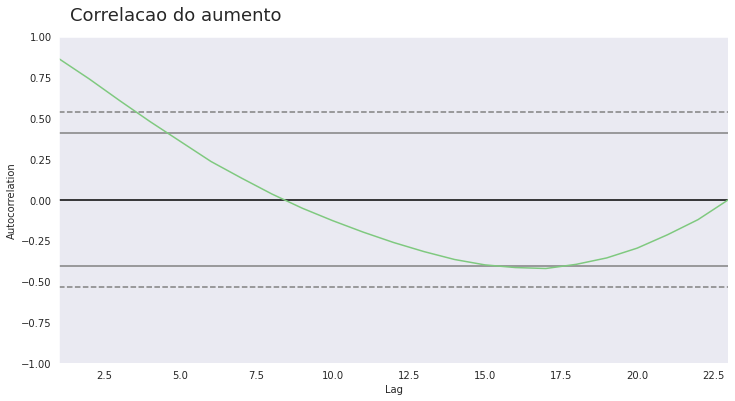

In [22]:
auto_correlacao('Correlacao do aumento', 'aumento', 1)

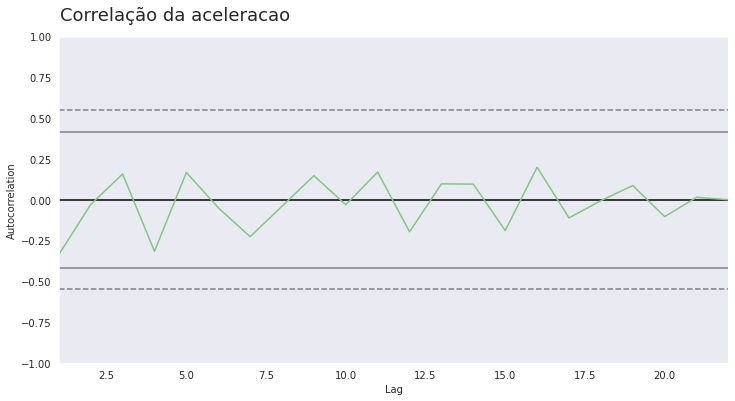

In [23]:
auto_correlacao('Correlação da aceleracao', 'aceleracao', 2)

# Alucar - Analisando assinantes da newsletter

In [24]:
assinantes = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [25]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [26]:
print(f'Quantidade de dados nulos = {assinantes.isna().sum().sum()}')
print(f'Quantidade de linhas e colunas: {assinantes.shape}')


Quantidade de dados nulos = 0
Quantidade de linhas e colunas: (24, 2)


In [27]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [28]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [29]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [30]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [31]:
def plot_comparacao(titulo, x, y1, y2, y3, dataset):
    ax = plt.figure(figsize=(18, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18)
    plotar('', '', y1, x, y1, dataset)
    plt.subplot(3,1,2)
    plotar('', '', y2, x, y2, dataset)
    plt.subplot(3,1,3)
    plotar('', '', y3, x, y3, dataset)

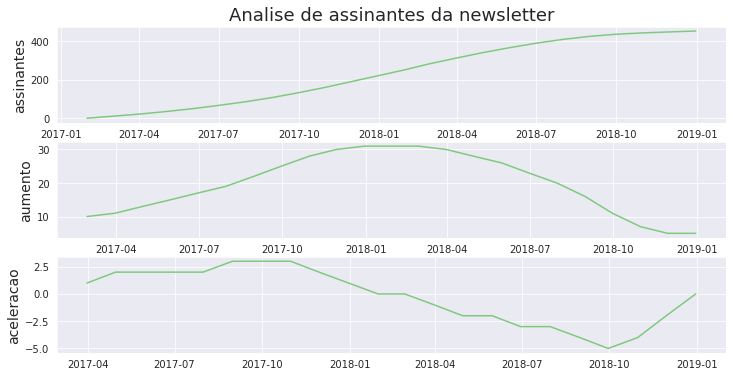

In [32]:
plot_comparacao('Analise de assinantes da newsletter', 'mes', 'assinantes', 
                'aumento', 'aceleracao', assinantes)

* 1. Grafico 1: Assinantes
    * Ao observar a figura, nota-se no primeiro grafico o numero de de assinantes da newsletter ao longo do tempo.
    * Há um visível crescimento ao longo do tempo, porem noto-se uma estagnação do mesmo.
* 2. Grafico 2: Aunento
    * No segundo grafico observa-se a taxa, quantidade de assinaturas obtidas em determinado periodo, ao longo dos meses.
    * É aparente que houve um crescimento forte de assinantes até o 1 semestre de 2018, porém a partir dai um declinio substancial no numero de novos assinantes.
* 3. Grafico 3: Aceleração
    * Por fim no ultimo grafico, tem-se a aceleração da taxa de aumento de assinantes.
    * Nele vemos que houve uma aceleração positiva até final de 2017, e seguindo desse ponto uma aceleração negativa de quase -5. 

# Chocolura

## Analisando as Vendas

In [70]:
chocolura = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/chocolura.csv')

In [71]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [72]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [73]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [74]:
print(f'Quantidade de linhas e colunas = {chocolura.shape}')
print(f'Quantidade de dados nulos = {chocolura.isna().sum().sum()}')

Quantidade de linhas e colunas = (24, 2)
Quantidade de dados nulos = 0


In [75]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao']  = chocolura['aumento'].diff()

In [76]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


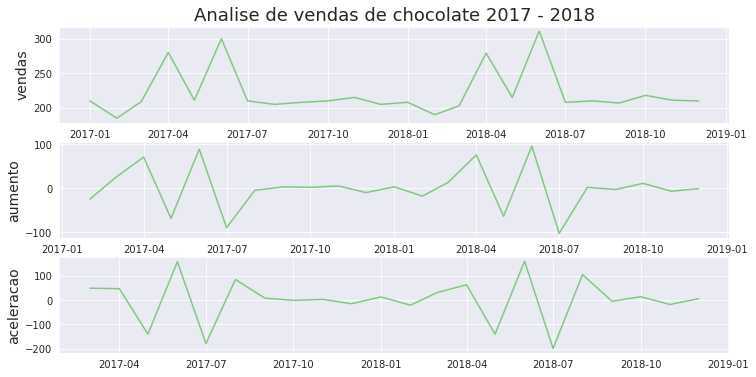

In [77]:
plot_comparacao('Analise de vendas de chocolate 2017 - 2018', 'mes', 
                'vendas', 'aumento', 'aceleracao', chocolura)

* A partir dos graficos plotados, é notavel uma sazonalidade nas vendas de chocolate, nos meses de Abril e Junho. Muito provavel pelos feriados de 'pascoa' e "dia dos namorados" nos respectivos meses.   

## Chocolura - analise de vendas diarias de Out e Nov

In [41]:
vendas_por_dia = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [42]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [43]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [44]:
print(f'Quantidade de linhas e colunas {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos {vendas_por_dia.isna().sum().sum()}')

Quantidade de linhas e colunas (61, 2)
Quantidade de dados nulos 0


In [45]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


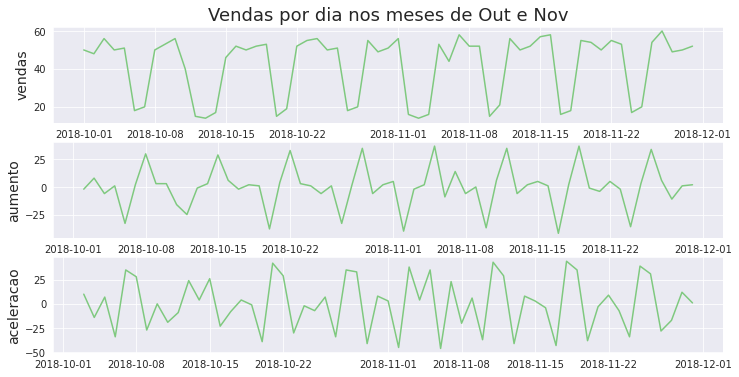

In [46]:
plot_comparacao('Vendas por dia nos meses de Out e Nov', 'dia', 'vendas',
                'aumento', 'aceleracao', vendas_por_dia)

#### **Analisando a sazonalidade**

In [47]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [48]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [49]:
# Traduzindo dias da semana para portugues
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [50]:
dia_da_semana_map = {'Monday' : 'Segunda',
                     'Tuesday' : 'Terca',
                     'Wednesday' : 'Quarta',
                     'Thursday' : 'Quinta',
                     'Friday' : 'Sexta',
                     'Saturday' : 'Sabado',
                     'Sunday' : 'Domingo'}

In [51]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dia_da_semana_map)

In [52]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


**Agrupando as vendas por dia**

In [53]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 
                                                           'aceleracao'].mean().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [54]:
vendas_agrupadas.head(8)

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,18.88,3.00,30.75
Quarta,53.11,1.44,2.11
Quinta,51.33,-1.78,-3.22
Sabado,15.88,-27.75,-19.88
Segunda,52.33,33.75,30.75
Sexta,44.56,-6.78,-5.00
Terca,51.67,-0.67,-34.25


* Analisando a sazonalidade, as quedas de venda mostrada nos graficos, se da nos finais de semana 

** Correlação das vendas diarias

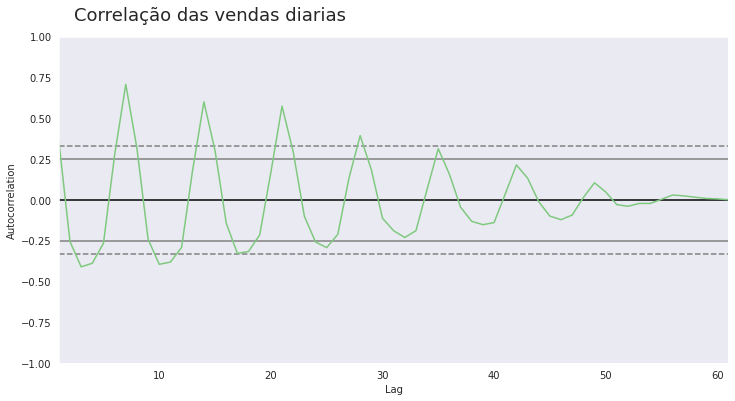

In [55]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diarias', fontsize=18, x=.3 , y=.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

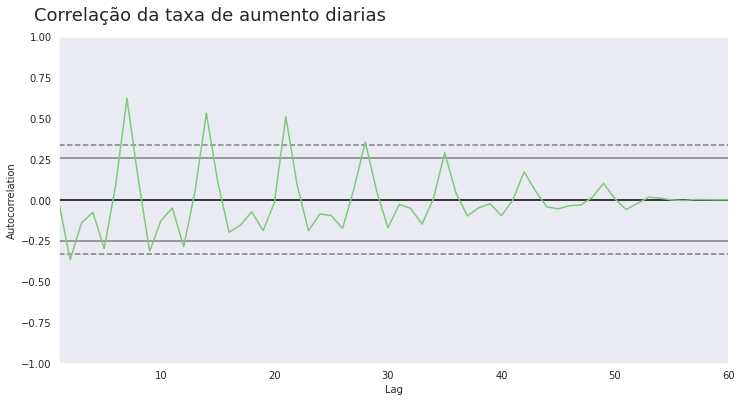

In [56]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da taxa de aumento diarias', fontsize=18, x=.3 , y=.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

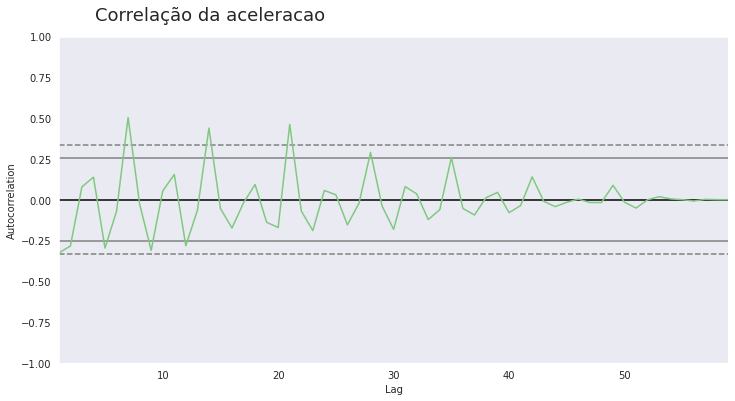

In [57]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao', fontsize=18, x=.3 , y=.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Analise de uma cafeteria

In [58]:
cafelura = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/cafelura.csv')
cafelura.sample(3)

,mes,vendas
17,2018-06-30,35280
12,2018-01-31,23436
6,2017-07-31,8096


In [59]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [60]:
print(f'Quantidade de linhas e colunas = {cafelura.shape}')
print(f'Quantidade de valores nulos = {cafelura.isna().sum().sum()}')

Quantidade de linhas e colunas = (24, 2)
Quantidade de valores nulos = 0


In [61]:
cafelura['mes'] = pd.to_datetime(cafelura['mes']) 

In [62]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [63]:
cafelura.sample(3)

,mes,vendas
5,2017-06-30,7380
2,2017-03-31,3240
17,2018-06-30,35280


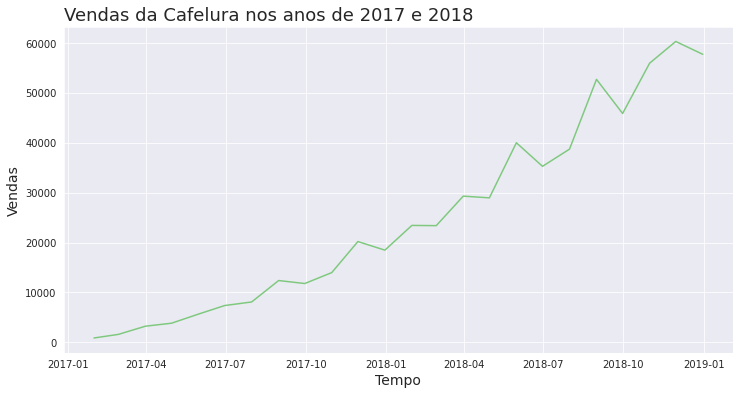

In [64]:
plotar('Vendas da Cafelura nos anos de 2017 e 2018', 'Tempo', 
       'Vendas', 'mes', 'vendas', cafelura)

In [65]:
quantidade_dias_find = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/dias_final_de_semana.csv')
quantidade_dias_find.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [66]:
quantidade_dias_find['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [67]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_dias_find['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


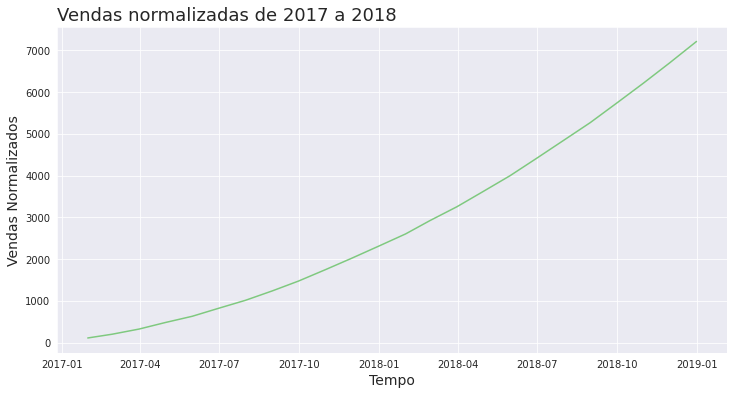

In [68]:
plotar('Vendas normalizadas de 2017 a 2018', 'Tempo', 
       'Vendas Normalizados', 'mes', 'vendas_normalizadas', cafelura)

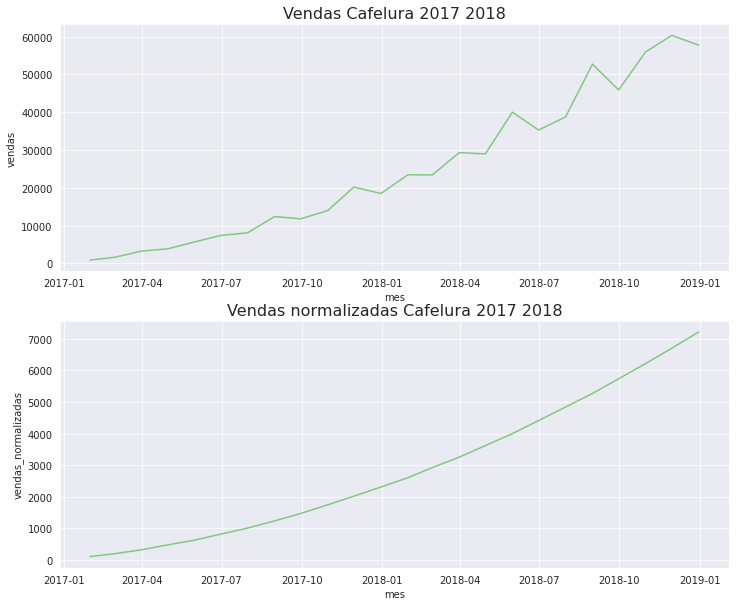

In [69]:
plt.figure(figsize=(12,10))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 2018', fontsize=16)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax= plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 2018', fontsize=16)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)

# Statesmodels

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

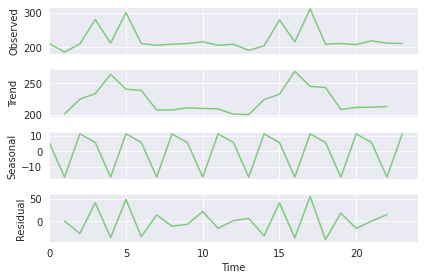

In [86]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [89]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [92]:
df_resultado = ({'observacao' : observacao,
                 'tendencia': tendencia,
                 'sazonalidade' : sazonalidade,
                 'ruido' : ruido})
resultado = pd.DataFrame(df_resultado).round(3)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603,NaN
1,185,201.333,-16.730,0.397
2,209,224.667,11.127,-26.794
3,280,233.333,5.603,41.063
4,211,263.667,-16.730,-35.937


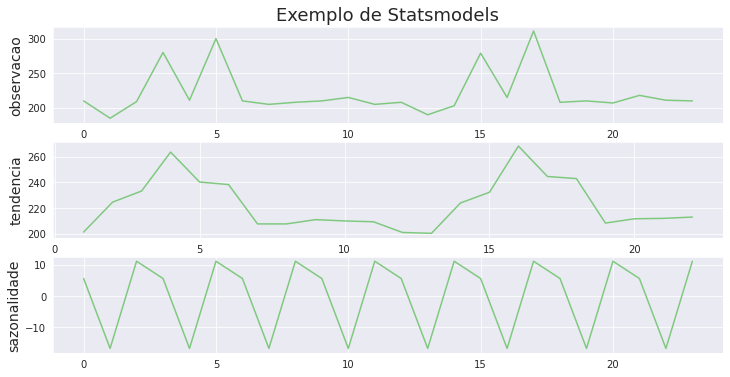

In [93]:
plot_comparacao('Exemplo de Statsmodels', resultado.index, 'observacao', 'tendencia', 
                'sazonalidade', resultado)

# Alucel - analise de vendas

In [95]:
alucel = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [96]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [101]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [103]:
print(f'Quantidade de linhas e colunas = {alucel.shape}')
print(f'Quantidade de dados nulos {alucel.isna().sum().sum()}')

Quantidade de linhas e colunas = (61, 2)
Quantidade de dados nulos 0


In [104]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [105]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


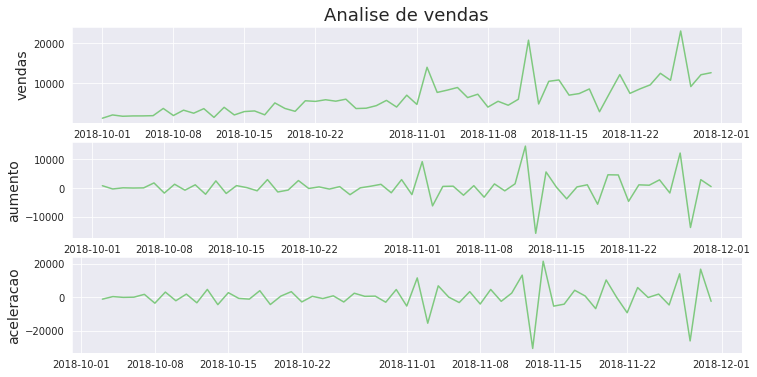

In [108]:
plot_comparacao('Analise de vendas', 
                'dia', 
                'vendas', 
                'aumento', 
                'aceleracao', 
                alucel)

### Normalizando as curvas de plot

**Média móvel**

In [109]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [110]:
alucel.head()

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


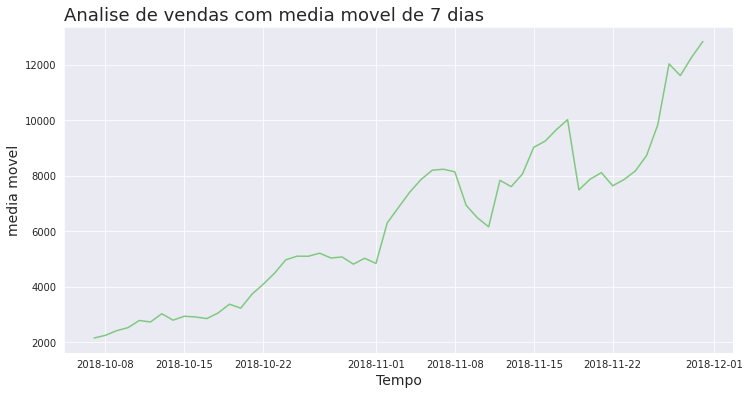

In [112]:
plotar('Analise de vendas com media movel de 7 dias', 
       'Tempo','media movel', 'dia', 
       'media_movel', alucel)

In [116]:
alucel['media_movel_14'] = alucel['vendas'].rolling(14).mean()

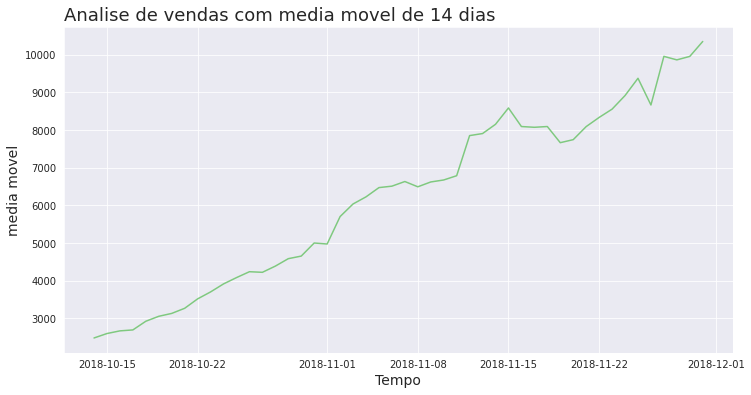

In [117]:
plotar('Analise de vendas com media movel de 14 dias', 
       'Tempo','media movel', 'dia', 
       'media_movel_14', alucel)

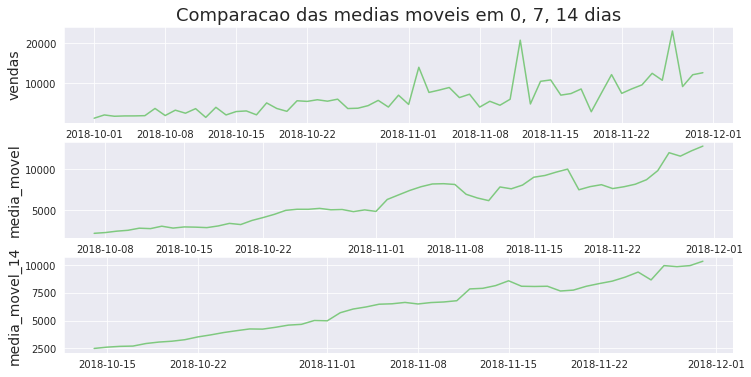

In [119]:
plot_comparacao('Comparacao das medias moveis em 0, 7, 14 dias', 'dia',
                'vendas', 'media_movel', 'media_movel_14', alucel)